# Explore example datasets

We provide the option to download subsets of existing open datasets with opportunistic sensor data. In this notebook we present these datasets and their subsets.

In [1]:
import matplotlib.pyplot as plt

import poligrain as plg

## OpenMRG

The data is downloaded from https://github.com/OpenSenseAction/opensense_example_data/tree/main/OpenMRG

This is based on the OpenMRG dataset described in Andersson et al. (2022) https://doi.org/10.5194/essd-14-5411-2022

Currently there are two different subsets:
- `'5min_2h'`: 2.5 hours of data, all sensors aggregated to 5 minutes temporal resolution
- `'8d'`: 8 days of data from the OpenMRG project (default subset). The CML data is processed using radar data as wet-dry indicator with `pycomlink`.

For details of how the data was generated see the notebook in the example data repo linked above.


In [2]:
(
    ds_rad,
    ds_cmls,
    ds_gauges_municp,
    ds_gauge_smhi,
) = plg.example_data.load_openmrg(data_dir="example_data", subset="8d")

Compare hourly rainfall sums of one CML and one gauge. Note that these are just two randomly chosen IDs of CML and gauge for illustration purposese. 

Check out the notebook on finding neighboring gauges for CMLs to learn how to find the closest gauge for a CML.

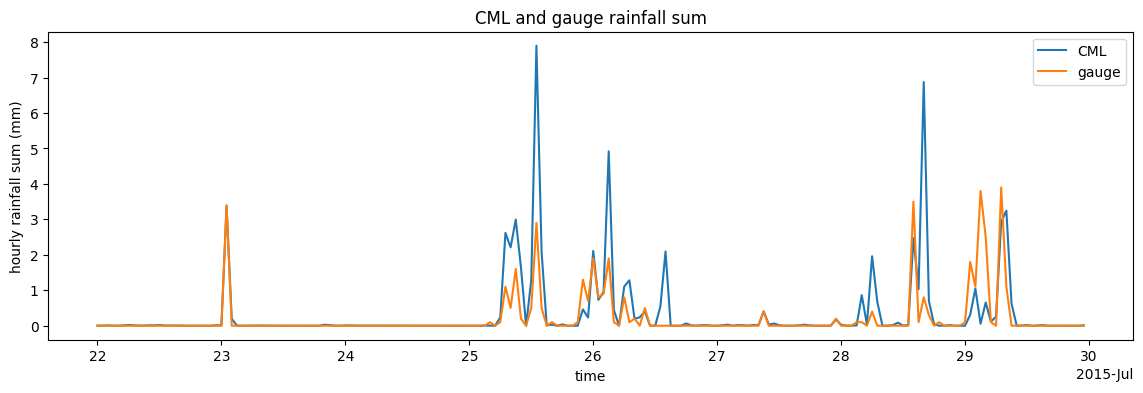

In [3]:
ds_cml = ds_cmls.isel(cml_id=1, sublink_id=0)
ds_cml.R.resample(time="1h").mean().plot(figsize=(14, 4), label="CML")
ds_gauges_municp.isel(id=0).rainfall_amount.resample(time="1h").sum().plot(
    label="gauge"
)
plt.legend()
plt.ylabel("hourly rainfall sum (mm)")
plt.title("CML and gauge rainfall sum");

Plot rainfall accumulation for all CMLs (in blue) and the ten city gauges (in black). 

This shows that, besides some CML outliers, the rainfall accumulation is in the same range.

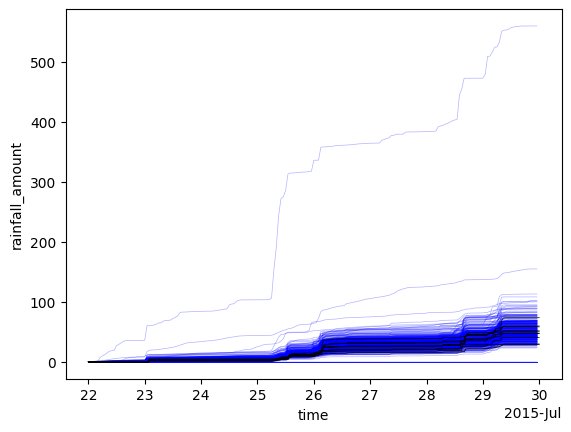

In [4]:
ds_cmls.isel(sublink_id=0).R.resample(time="1h").mean().cumsum(dim="time").plot.line(
    x="time", color="b", linewidth=0.5, alpha=0.3, add_legend=False
)
ds_gauges_municp.rainfall_amount.cumsum(dim="time").plot.line(
    x="time", color="k", linewidth=0.5, add_legend=False
);

Plot rainfall sum over the full 8 days for all sensors (radar, CML, city gauges) on a map.

<Axes: xlabel='lon', ylabel='lat'>

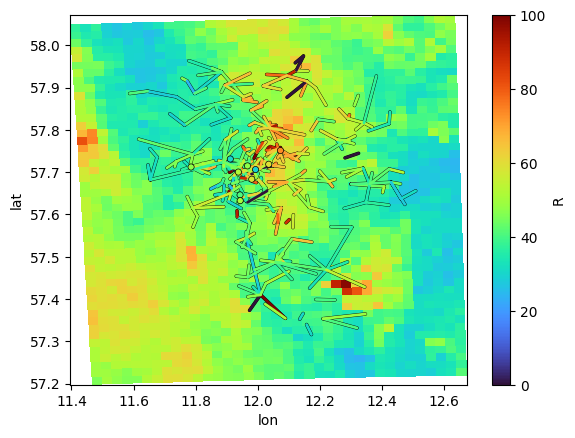

In [5]:
plg.plot_map.plot_plg(
    da_cmls=ds_cmls.isel(sublink_id=0).R.resample(time="1h").mean().sum(dim="time"),
    da_grid=ds_rad.R.resample(time="1h").mean().sum(dim="time"),
    da_gauges=ds_gauges_municp.rainfall_amount.sum(dim="time"),
    vmin=0,
    vmax=100,
)

## OpenRainER

...to be added...

## Amsterdam PWS data